# Homework 2

In [18]:
'''
Packages
'''
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Consider the truncated Karhunen-Loeve expansion $Y_t^d$, $t \in [0,1]$, with eigenfunctions $\psi_i (t) = sin(\pi i t)$ and eigenvalues $\lambda_i = 1/(\pi i)^2$ .

In [106]:
def psi(i, t):
    return np.sin(np.pi * i * t)

def lam(i):
    return 1 / (np.pi * i)**2

In [105]:
def Y_hat(dist="uniform"):
    # Normal distribution N(0,1)
    if dist == 'normal':
        return np.random.normal(0,1)
    
    # Uniform distribution [-1,1]
    else:
        return np.random.uniform(-1,1)

Text(0.5, 1.0, 'First 9 eigenvalues.\nThe signal has a long correlation length')

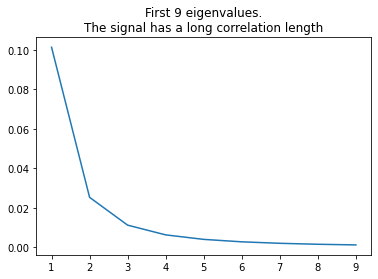

In [4]:
ans = np.zeros(9)
x = np.arange(1,10)

for i in x:
    ans[i-1] = lam(i)
plt.plot(x,ans)
plt.title("First 9 eigenvalues.\nThe signal has a long correlation length")

In [175]:
def plot_distr(b, k, timesteps, distr="uniform"):
    time = np.linspace(0,1,timesteps)
    
    row=0
    for t in time:
        for realization in range(k):
            Y_t = 0
            for i in range(1,b+1):
                Y_t += np.sqrt(lam(i+1)) * psi(i+1, t) * Y_hat(distr)
            Y_ts[row, 0] = t
            Y_ts[row, 1] = Y_t
            row+=1
    frame = pd.DataFrame(Y_ts, columns=['time','Y_t'])
    ax = sns.displot(frame, x='time', y='Y_t')
    ax.set(ylim=(-1,1))

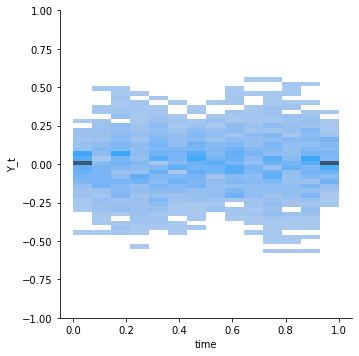

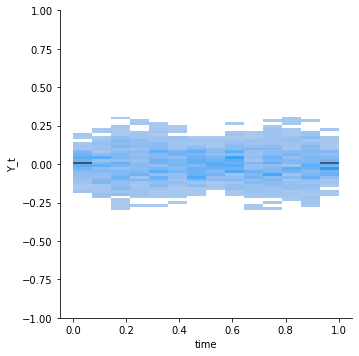

In [178]:
plot_distr(b=10, k=50, timesteps=50, distr="normal")
plot_distr(b=10, k=50, timesteps=50)

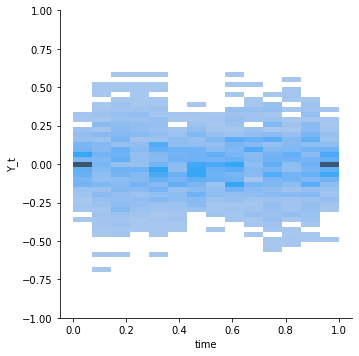

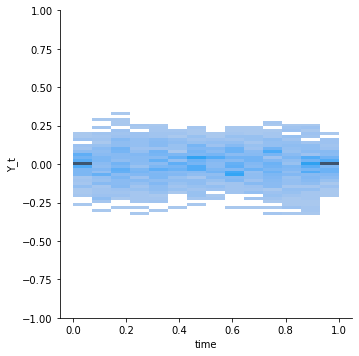

In [179]:
plot_distr(b=100, k=50, timesteps=50, distr="normal")
plot_distr(b=100, k=50, timesteps=50)

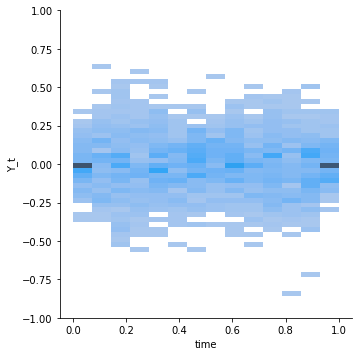

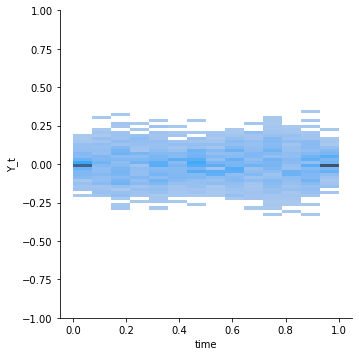

In [180]:
plot_distr(b=1000, k=50, timesteps=50, distr="normal")
plot_distr(b=1000, k=50, timesteps=50)

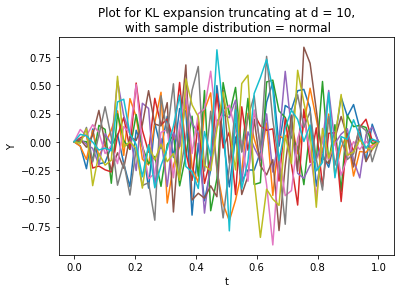

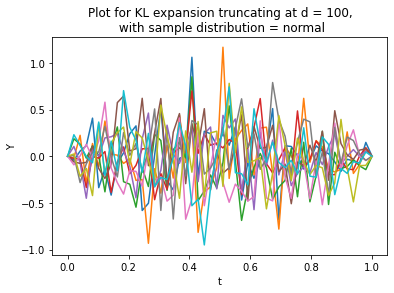

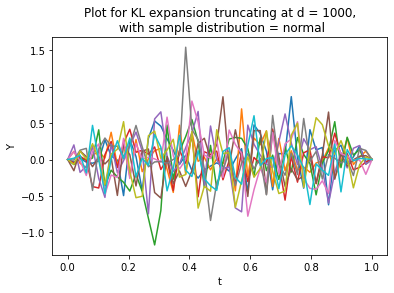

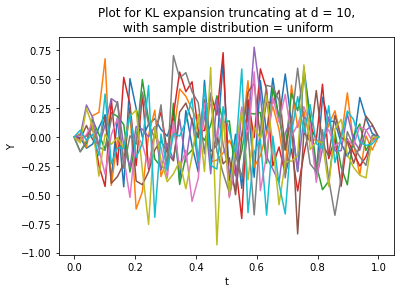

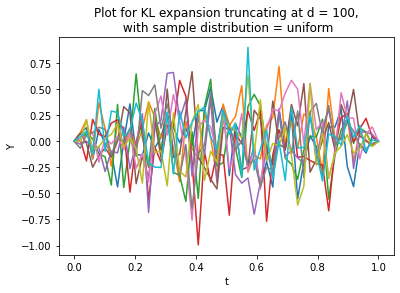

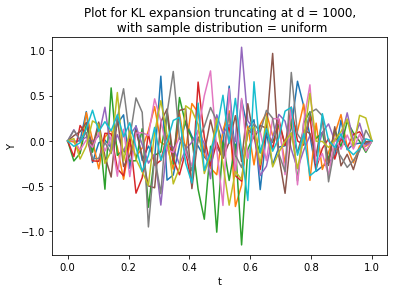

In [181]:
# Construct and plot sample paths (i.e., realizations) of Y with d = 10, 100, 1000
ds = [10, 100, 1000]
dists = ['normal', 'uniform']

# Do for both normal and uniform
for dist in dists:
    # Do for different truncation points
    for d in ds:
        # Do multiple times for each d
        for k in range(10):
            time = np.linspace(0, 1, 50)
            Y_t = []

            # Over time
            for t in time:
                Y = 0
                # Summing until truncation point
                for i in range(1, d + 1):
                    Y += np.sqrt(lam(i)) * psi(i, t) * Y_hat('normal')
                Y_t.append(Y)

            plt.plot(time, Y_t)
        
        plt.xlabel("t")
        plt.ylabel("Y")
        plt.title(f"Plot for KL expansion truncating at d = {d},\n with sample distribution = {dist}")
        plt.show()

With normal distributions ($\hat{Y}_i ∼ N(0,1)$ for all i), $B_t^d := \sqrt{2} Y_t^d$ is the KL expansion for the Brownian bridge process Bt. What is the covariance function $C(t,s)$ of the Brownian bridge? Can you prove that $(\psi_i(t),\lambda_i)$ as defined above are indeed the eigenfunctions and eigenvalues of the Brownian bridge covariance function?

Answer: ...